In [1]:
from bs4 import BeautifulSoup
# Imports
import asyncio
import hashlib
import random
import time
from datetime import date
from urllib.request import Request, urlopen

import pandas as pd
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
from requests import Session
from requests.utils import unquote
ua = UserAgent(fallback="chrome")
import re

## Testing "link_extractor"

In [2]:
import pandas as pd
from link_extractor import Google, Bing, Yahoo

### Testing Google class

In [3]:
google = Google(company="UBS")
google_links = google.get_links(max_articles=None)

In [4]:
google_links

,Search Engine,Link
0,Google,https://www.reuters.com/business/finance/ubs-f...
1,Google,https://www.cnbc.com/2023/04/04/credit-suisse-...
2,Google,https://triblive.com/news/world/ubs-confident-...
3,Google,https://www.investing.com/news/stock-market-ne...
4,Google,https://www.bloomberg.com/news/articles/2023-0...
...,...,...
297,Google,https://www.cnbc.com/video/2023/03/17/a-friday...
298,Google,https://www.ft.com/content/9058bfec-85a5-4983-...
299,Google,https://www.cnn.com/business/live-news/stock-m...
300,Google,https://www.businessinsider.com/credit-suisse-...


### Testing Bing class

In [5]:
bing = Bing(company="UBS")
bing_links = bing.get_links(max_articles=None)

In [6]:
bing_links

,Search Engine,Link
0,Bing,https://www.msn.com/en-us/money/markets/histor...
1,Bing,https://www.msn.com/en-gb/money/topstories/ubs...
2,Bing,https://www.reuters.com/article/ubs-group-agm/...
3,Bing,https://www.chron.com/news/politics/article/sw...
4,Bing,https://www.msn.com/en-ca/money/topstories/ubs...
...,...,...
153,Bing,https://www.ubs.com/us/en/wealth-management/in...
154,Bing,https://www.ubs.com/us/en/wealth-management/in...
155,Bing,https://www.ubs.com/us/en/wealth-management/in...
156,Bing,https://www.ubs.com/global/en/careers/poland.html


### Testing Yahoo class

In [7]:
yahoo = Yahoo(company="UBS")
yahoo_links = yahoo.get_links(max_articles=None)

In [8]:
yahoo_links

,Search Engine,Link
0,Yahoo,https://www.upi.com/Top_News/World-News/2023/0...
1,Yahoo,https://www.msn.com/en-in/money/topstories/ubs...
2,Yahoo,https://www.washingtonpost.com/business/2023/0...
3,Yahoo,https://www.benzinga.com/m-a/23/04/31677337/ub...
4,Yahoo,https://www.ozarksfirst.com/news/finance-and-b...
...,...,...
85,Yahoo,https://www.msn.com/en-us/money/savingandinves...
86,Yahoo,https://www.etfdailynews.com/2023/04/04/ubs-gr...
87,Yahoo,https://seekingalpha.com/news/3953632-ubs-appl...
88,Yahoo,https://www.benzinga.com/content/www-tipranks-...


## Testing "html_content_extractor2"

### Combine links from Google, Bing, and Yahoo

In [9]:
links = pd.concat([google_links, bing_links, yahoo_links])

In [10]:
links["Search Engine"].value_counts()

Google    302
Bing      158
Yahoo      90
Name: Search Engine, dtype: int64

In [11]:
links["Link"].duplicated().sum()

67

In [12]:
urls = links["Link"].drop_duplicates().to_list()
len(urls)

483

In [13]:
from content_extractor2 import get_content

In [14]:
results = get_content(urls)

Getting news article info: 100%|██████████| 483/483 [22:13<00:00,  2.76s/it]

The following news sources could not be accessed or resulted in an error:
https://www.investing.com/news/stock-market-news/johnson--johnson-fedex-and-conagra-foods-rise-premarket-ubs-falls-3049438 

https://www.atchisonglobenow.com/news/world/ubs-confident-about-credit-suisse-deal-despite-huge-risk/article_32267a5e-f9a8-58e3-bddc-ba2189cbadd9.html 

https://www.nytimes.com/2023/04/04/business/dealbook/credit-suisse-shareholders.html 

https://www.wdrb.com/news/national/ubs-confident-about-credit-suisse-deal-despite-huge-risk/article_47608b06-7007-5fa1-bca1-1336cab77967.html 

https://www.timesdaily.com/business/ubs-confident-about-credit-suisse-deal-despite-huge-risk/article_9c97c2b3-8058-5e56-bfe3-58f0b6cf1ecb.html 

https://www.nytimes.com/2023/03/29/business/dealbook/ubs-ceo-ermotti.html 

https://www.nytimes.com/2023/03/29/business/dealbook/ubs-credit-suisse-sergio-ermotti.html 

https://www.investing.com/news/commodities-news/opec-supply-cuts-may-have-been-aimed-at-shortsellers--u

In [15]:
results.head(10)

,Link,Title,Body,Author,Published
0,https://www.reuters.com/business/finance/ubs-f...,UBS tells investors 'Herculean' Credit Suisse ...,[1/3] Buildings of Swiss banks UBS and Credit ...,[Noele Illien],2023-04-05 00:00:00
1,https://www.cnbc.com/2023/04/04/credit-suisse-...,'I am truly sorry': Credit Suisse chair pleads...,In this article CSG.N-CH Follow your favorite ...,[Elliot Smith],2023-04-04 00:00:00
2,https://triblive.com/news/world/ubs-confident-...,UBS confident about Credit Suisse deal despite...,TribLIVE's Daily and Weekly email newsletters ...,[Associated Press],2023-04-05 09:01:03-04:00
3,https://www.bloomberg.com/news/articles/2023-0...,UBS Chairman’s Top-Secret Prep Paid Off in Cre...,Moonshot: Space Elevator\n\nTheories on how to...,"[Jan-Henrik Foerster, Aaron Kirchfeld, Katheri...",2023-04-04 00:00:00
4,https://finance.yahoo.com/news/tesla-manufactu...,"Tesla Manufactured 4,000 Model Ys In One Week,...","Philipp Rickenbacher, the chief executive of S...",[Vandana Singh],None
5,https://www.bloomberg.com/news/articles/2023-0...,Most Holders of UBS Bonds Issued Just Weeks Ag...,Moonshot: Space Elevator\n\nTheories on how to...,"[Ronan Martin, Abhinav Ramnarayan, Ronan Marti...",2023-04-05 00:00:00
6,https://www.dw.com/en/ubs-to-slash-up-to-36000...,"UBS to slash up to 36,000 jobs after Credit Su...",The bank is looking to trim down after the blo...,[],None
7,https://fortune.com/2023/04/02/ubs-cut-workfor...,UBS to cut workforce by up to 30% after Credit...,UBS Group AG will cut its workforce by between...,[Bastian Benrath Bloomberg],2023-04-02 00:00:00
8,https://www.finews.com/news/english-news/56675...,Ralph Hamers to UBS: Stay Agile and Have Purpose,"Yesterday, Credit Suisse held its last annual ...",[],2023-04-05 10:19:21
9,https://www.reuters.com/markets/deals/ubs-gets...,UBS gets temporary EU green light for Credit S...,"\n\n\n\n\n\n\n\n\n\n\n\n\n\nBRUSSELS, April 4 ...",[Foo Yun Chee],2023-04-04 00:00:00


## Some NLP Preprocessing

In [16]:
len(results)

445

In [17]:
data = results.loc[results["Body"].str.strip().astype(bool)].reset_index(drop=True)

In [18]:
len(data)

401

In [19]:
data.head()

,Link,Title,Body,Author,Published
0,https://www.reuters.com/business/finance/ubs-f...,UBS tells investors 'Herculean' Credit Suisse ...,[1/3] Buildings of Swiss banks UBS and Credit ...,[Noele Illien],2023-04-05 00:00:00
1,https://www.cnbc.com/2023/04/04/credit-suisse-...,'I am truly sorry': Credit Suisse chair pleads...,In this article CSG.N-CH Follow your favorite ...,[Elliot Smith],2023-04-04 00:00:00
2,https://triblive.com/news/world/ubs-confident-...,UBS confident about Credit Suisse deal despite...,TribLIVE's Daily and Weekly email newsletters ...,[Associated Press],2023-04-05 09:01:03-04:00
3,https://www.bloomberg.com/news/articles/2023-0...,UBS Chairman’s Top-Secret Prep Paid Off in Cre...,Moonshot: Space Elevator\n\nTheories on how to...,"[Jan-Henrik Foerster, Aaron Kirchfeld, Katheri...",2023-04-04 00:00:00
4,https://finance.yahoo.com/news/tesla-manufactu...,"Tesla Manufactured 4,000 Model Ys In One Week,...","Philipp Rickenbacher, the chief executive of S...",[Vandana Singh],None


In [20]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

import string
import nltk
# Import the stop word list
from nltk.corpus import stopwords
nltk.download("stopwords")
# Import Tokenizer
from nltk.tokenize import RegexpTokenizer
#Import Lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# Import stemmer.
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnbergmann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/johnbergmann/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
# Average Wordcount before pre-processing
data["Body"].apply(lambda x: len(x.split())).mean()

472.0074812967581

In [22]:
# Total Wordcount before pre-processing
data["Body"].apply(lambda x: len(x.split())).sum()

189275

### Remove Numbers (We are doing reputational NLP so doesnt seem relevant)

In [23]:
def remove_numbers(text):
    no_nums = "".join([i for i in text if not i.isdigit()])
    return no_nums

In [24]:
data["Body"] = data["Body"].apply(lambda x: remove_numbers(x))
data["Body"].head(10)

0    [/] Buildings of Swiss banks UBS and Credit Su...
1    In this article CSG.N-CH Follow your favorite ...
2    TribLIVE's Daily and Weekly email newsletters ...
3    Moonshot: Space Elevator\n\nTheories on how to...
4    Philipp Rickenbacher, the chief executive of S...
5    Moonshot: Space Elevator\n\nTheories on how to...
6    The bank is looking to trim down after the blo...
7    UBS Group AG will cut its workforce by between...
8    Yesterday, Credit Suisse held its last annual ...
9    \n\n\n\n\n\n\n\n\n\n\n\n\n\nBRUSSELS, April  (...
Name: Body, dtype: object

### Removing extra whitespaces / new lines

In [25]:
data["Body"] = data["Body"].replace(r'\n'," ", regex=True)

### Removing Punctuation

In [26]:
def remove_punctuation(text):
    no_punct = "".join ([c for c in text if c not in string.punctuation])
    return no_punct

In [27]:
data["Body"] = data["Body"].apply(lambda x: remove_punctuation(x))
data["Body"].head(10)

0     Buildings of Swiss banks UBS and Credit Suiss...
1    In this article CSGNCH Follow your favorite st...
2    TribLIVEs Daily and Weekly email newsletters d...
3    Moonshot Space Elevator  Theories on how to bu...
4    Philipp Rickenbacher the chief executive of Sw...
5    Moonshot Space Elevator  Theories on how to bu...
6    The bank is looking to trim down after the blo...
7    UBS Group AG will cut its workforce by between...
8    Yesterday Credit Suisse held its last annual g...
9                  BRUSSELS April  Reuters  UBS UBS...
Name: Body, dtype: object

### Tokenization

In [28]:
tokenizer = RegexpTokenizer(r'\w+')

In [29]:
data["Body"] = data["Body"].apply(lambda x: tokenizer.tokenize(x.lower()))
data["Body"].head(10)

0    [buildings, of, swiss, banks, ubs, and, credit...
1    [in, this, article, csgnch, follow, your, favo...
2    [triblives, daily, and, weekly, email, newslet...
3    [moonshot, space, elevator, theories, on, how,...
4    [philipp, rickenbacher, the, chief, executive,...
5    [moonshot, space, elevator, theories, on, how,...
6    [the, bank, is, looking, to, trim, down, after...
7    [ubs, group, ag, will, cut, its, workforce, by...
8    [yesterday, credit, suisse, held, its, last, a...
9    [brussels, april, reuters, ubs, ubsgs, has, se...
Name: Body, dtype: object

### Removing Stopwords

In [30]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words("english")]
    return words

In [31]:
data["Body"] = data["Body"].apply(lambda x: remove_stopwords(x))
data["Body"].head(10)

0    [buildings, swiss, banks, ubs, credit, suisse,...
1    [article, csgnch, follow, favorite, stocks, cr...
2    [triblives, daily, weekly, email, newsletters,...
3    [moonshot, space, elevator, theories, build, s...
4    [philipp, rickenbacher, chief, executive, swis...
5    [moonshot, space, elevator, theories, build, s...
6    [bank, looking, trim, bloating, caused, merger...
7    [ubs, group, ag, cut, workforce, completing, t...
8    [yesterday, credit, suisse, held, last, annual...
9    [brussels, april, reuters, ubs, ubsgs, secured...
Name: Body, dtype: object

### Lemmatization

In [32]:
lemmatizer = WordNetLemmatizer()

In [33]:
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize (i) for i in text]
    return lem_text

In [34]:
data["Body"] = data["Body"].apply(lambda x: word_lemmatizer(x))
data["Body"].head(10)

0    [building, swiss, bank, ubs, credit, suisse, s...
1    [article, csgnch, follow, favorite, stock, cre...
2    [triblives, daily, weekly, email, newsletter, ...
3    [moonshot, space, elevator, theory, build, spa...
4    [philipp, rickenbacher, chief, executive, swis...
5    [moonshot, space, elevator, theory, build, spa...
6    [bank, looking, trim, bloating, caused, merger...
7    [ubs, group, ag, cut, workforce, completing, t...
8    [yesterday, credit, suisse, held, last, annual...
9    [brussels, april, reuters, ubs, ubsgs, secured...
Name: Body, dtype: object

In [35]:
# Average Wordcount after pre-processing
data["Body"].apply(lambda x: len(x)).mean()

277.66583541147133

In [36]:
# Total Wordcount after pre-processing
data["Body"].apply(lambda x: len(x)).sum()

111344

### Encoding

In [37]:
text = data["Body"].apply(lambda x: " ".join(x)).str.cat()

In [38]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 abcdefghijklmnopqrstuvwxyzáâãäçéíïñöü
38


In [39]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate (chars) }
itos = { i:ch for i,ch in enumerate (chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''. join ( [itos [i] for i in l]) # decoder: take a list of integers, output a string
print (encode("hii there"))
print (decode(encode("hii there")))

[8, 9, 9, 0, 20, 8, 5, 18, 5]
hii there


### Wordcloud - Test

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

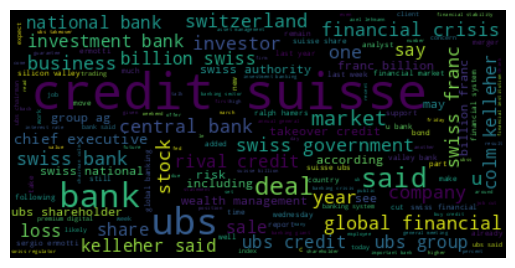

In [41]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud on Titles only

In [42]:
data["Title"] = data["Title"].apply(lambda x: remove_numbers(x))
data["Title"] = data["Title"].replace(r'\n'," ", regex=True)
data["Title"] = data["Title"].apply(lambda x: remove_punctuation(x))
data["Title"] = data["Title"].apply(lambda x: tokenizer.tokenize(x.lower()))
data["Title"] = data["Title"].apply(lambda x: remove_stopwords(x))
data["Title"] = data["Title"].apply(lambda x: word_lemmatizer(x))

In [43]:
title_text = data["Body"].apply(lambda x: " ".join(x)).str.cat()

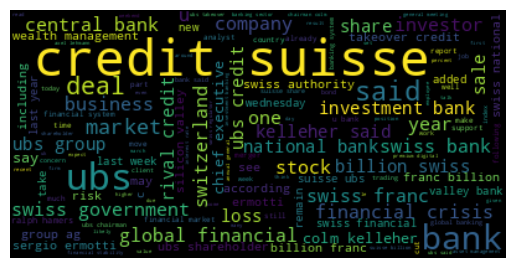

In [44]:
# Create and generate a word cloud image:
title_wordcloud = WordCloud().generate(title_text)

# Display the generated image:
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()